# 문제의 규정 및 본 파일의 구성
## 1) 문제의 규정
- 문제: 본문을 통해 프로젝트의 status를 추측하고 싶다.
- 가설: QA모델로 본문의 특징을 추출했을 때, 어떠한 status를 대표하는 vocabulary가 답변에 많이 나온다면 status를 추측할 수 있다.
- 하위 문제: 각 deal status별로 본문에서 가장 특징적인 vocabulary들을 어떻게 골라낼 것인가?
- 하위 문제 해결 후보 방법:  
1) word counting 후 중복 제거  
2) word appearance 확인 후 중복 제거  
3) 1을 기반으로 회귀분석 / vocab별 가중치에 따라 판단  
4) 1을 기반으로 의사결정나무 구성 / 변수의 중요도에 따라 판단

## 2) 본 파일의 구성
1. Preparations (Word Counting 수행, 라이브러리 등 불러오기)
2. Word Counting 파일 기본 속성 뜯어보기
3. Word Counting 후 중복 제거 (문제 해결 후보 1)
4. Word Appearance로 변환 후 중복 제거 (문제 해결 후보 2)
5. 회귀분석 (문제 해결 후보 3)
6. 의사결정나무 (문제 해결 후보 4)
7. 결론 및 개선점

# 1. Preparations
## 1) Count the vocabularies
### a. Tokenize the body texts and count each vocabs
#### (private repo) https://github.com/Sensodyne/sdp-vocab-selector.git
- Punctuations and stopwords were removed
- Normalized but not stemmed (소문자로 통일하였으나 단어를 기본형으로 바꾸지 않았음. 시제와 복수형태 등 살림)

## 2) Prepare the environment

In [1]:
# import packages and libraries
import pandas as pd
import numpy as np

# modules to draw charts
import matplotlib.pyplot as plt
import matplotlib
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles

In [2]:
# environment settings for charts
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # 폰트는 맑은고딕
matplotlib.rcParams['axes.unicode_minus'] = False    # 마이너스 폰트 깨지는 것에 대해
plt.rcParams['figure.figsize'] = (17, 6)

In [3]:
# file path of the tsv file
file_path = 'word_counted.tsv'

In [ ]:
# df_temp = pd.read_csv('final_result.tsv', sep='\t')
# df_temp

# def function(article:str, words:dict):
#     # 기사를 가지고 Q, A 생성
#     # 생성된 Q, A의 단어들을 words와 매치
#     # 몇 개가 매치되었느냐? (각 status 별로)를 리턴
#     return operation, cancelled, delayed, active

In [4]:
# read the input
df = pd.read_csv(file_path, sep='\t')

In [5]:
# word_counted (DataFrame)
df

deal_status                                          body_text  \
0     operation  Saudi Arabia-headquartered utilities company A...   
1     operation  Saudi-based Acwa Power, a major developer of p...   
2     operation  Tata Power has an installed hydro power capaci...   
3     operation  The project will generate around 450 GWh of cl...   
4     operation  Adjaristsqali Georgia (AGL), a joint venture b...   
..          ...                                                ...   
872     Delayed  Hybrid solar-wind-battery complex in Australia...   
873     Delayed  Plans to build the $12 billion Inga 3 hydropow...   
874     Delayed  Global Coal Plant Tracker shows project pipeli...   
875     Delayed  Floating solar project schedule in Seychelles ...   
876     Delayed  The resource you are looking for might have be...   

                                             word_list  jb  nee  rank  \
0    ['east', 'nation', 'saudi', 'communities', 'ho...   0    0     0   
1    ['east', 'operating', 'also', 'saudi', 'commun...   0    0     0   
2    ['hpp', 'gases', 'tata', 'also', 'georgia', 'e...   0    0     0   
3    ['gases', 'hpp', 'exclusively', 'tata', 'georg...   0    0     0   
4    ['hpp', 'institutions', 'gases', 'generated', ...   0    0     0   
..                                                 ...  ..  ...   ...   
872  ['update', 'become', 'wind', 'ongoing', 'facin...   0    0     0   
873  ['image', 'de', 'operating', 'become', 'presid...   0    0     0   
874  ['highlighted', 'bengal', 'slowed', 'defence',...   0    0     0   
875  ['mahe', 'lagoon', 'selected', 'delay', 'news'...   0    0     0   
876  ['looking', 'resource', 'unavailable', 'name',...   0    0     0   

     configuration  analysers  grants  competes  ...  funneled  lodged  \
0                0          0       0         0  ...         0       0   
1                0          0       0         0  ...         0       0   
2                0          0       0         0  ...         0       0   
3                0          0       0         0  ...         0       0   
4                0          0       0         0  ...         0       0   
..             ...        ...     ...       ...  ...       ...     ...   
872              0          0       0         0  ...         0       0   
873              0          0       0         0  ...         0       0   
874              0          0       0         0  ...         0       0   
875              0          0       0         0  ...         0       0   
876              0          0       0         0  ...         0       0   

     prides  lisa  wants  heal  maclennan  ozkan  modernization  grade  
0         0     0      0     0          0      0              0      0  
1         0     0      0     0          0      0              0      0  
2         0     0      0     0          0      0              0      0  
3         0     0      0     0          0      0              0      0  
4         0     0      0     0          0      0              0      0  
..      ...   ...    ...   ...        ...    ...            ...    ...  
872       0     0      0     0          0      0              0      0  
873       0     0      0     0          0      0              0      0  
874       0     0      0     0          0      0              0      0  
875       0     0      0     0          0      0              0      0  
876       0     0      0     0          0      0              0      0  

[877 rows x 18286 columns]

# 2. Word Counting 파일 기본 속성 뜯어보기
## deal_status 값 확인

In [6]:
# unique values of the column 'deal_status'
df['deal_status'].unique()

array(['operation', 'Active', 'Cancelled', 'Delayed'], dtype=object)

### a. 'deal_status' == 'operation'

In [7]:
df_operation = df[df['deal_status'] == 'operation']
df_operation

deal_status                                          body_text  \
0     operation  Saudi Arabia-headquartered utilities company A...   
1     operation  Saudi-based Acwa Power, a major developer of p...   
2     operation  Tata Power has an installed hydro power capaci...   
3     operation  The project will generate around 450 GWh of cl...   
4     operation  Adjaristsqali Georgia (AGL), a joint venture b...   
..          ...                                                ...   
378   operation  This content is for Premium Subscribers only. ...   
383   operation  Russia’s new Platov International Airport, whi...   
384   operation  Bohol-Panglao International Airport has starte...   
394   operation  The Diplomat. 25/03/2018\n\nThe new terminal b...   
407   operation  Russian Aviaton » Friday December 8, 2017 12:5...   

                                             word_list  jb  nee  rank  \
0    ['east', 'nation', 'saudi', 'communities', 'ho...   0    0     0   
1    ['east', 'operating', 'also', 'saudi', 'commun...   0    0     0   
2    ['hpp', 'gases', 'tata', 'also', 'georgia', 'e...   0    0     0   
3    ['gases', 'hpp', 'exclusively', 'tata', 'georg...   0    0     0   
4    ['hpp', 'institutions', 'gases', 'generated', ...   0    0     0   
..                                                 ...  ..  ...   ...   
378  ['view', 'subscribe', 'subscribers', 'premium'...   0    0     0   
383  ['old', 'airbus', 'places', 'international', '...   0    0     0   
384  ['image', 'valencia', 'de', 'yet', 'flights', ...   0    0     0   
394  ['capacity', 'authority', 'potentials', 'compa...   0    0     0   
407  ['thursday', 'old', 'capacity', 'march', 'rece...   0    0     0   

     configuration  analysers  grants  competes  ...  funneled  lodged  \
0                0          0       0         0  ...         0       0   
1                0          0       0         0  ...         0       0   
2                0          0       0         0  ...         0       0   
3                0          0       0         0  ...         0       0   
4                0          0       0         0  ...         0       0   
..             ...        ...     ...       ...  ...       ...     ...   
378              0          0       0         0  ...         0       0   
383              0          0       0         0  ...         0       0   
384              0          0       0         0  ...         0       0   
394              0          0       0         0  ...         0       0   
407              0          0       0         0  ...         0       0   

     prides  lisa  wants  heal  maclennan  ozkan  modernization  grade  
0         0     0      0     0          0      0              0      0  
1         0     0      0     0          0      0              0      0  
2         0     0      0     0          0      0              0      0  
3         0     0      0     0          0      0              0      0  
4         0     0      0     0          0      0              0      0  
..      ...   ...    ...   ...        ...    ...            ...    ...  
378       0     0      0     0          0      0              0      0  
383       0     0      0     0          0      0              0      0  
384       0     0      0     0          0      0              0      0  
394       0     0      0     0          0      0              0      0  
407       0     0      0     0          0      0              0      0  

[373 rows x 18286 columns]

In [8]:
# the total frequency of appearance (top 500)
operation_sum = df_operation.sum(axis = 0, numeric_only = True)
operation_sum.sort_values(ascending = False, inplace = True)
operation_most_frequent = operation_sum.nlargest(500)
operation_most_frequent_vocab = operation_most_frequent.index.tolist()
"""Uncomment below to check the top 500"""
operation_most_frequent_vocab

['power',
 'energy',
 'project',
 'plant',
 'solar',
 'wind',
 'million',
 'mw',
 'said',
 'company',
 'capacity',
 'airport',
 'new',
 'operation',
 'commercial',
 'construction',
 'first',
 'also',
 'year',
 'operations',
 'electricity',
 'development',
 'per',
 'total',
 'terminal',
 'lng',
 'gas',
 'renewable',
 'expressway',
 'international',
 'projects',
 'one',
 'two',
 'unit',
 'farm',
 'expected',
 'generation',
 'group',
 'years',
 'facility',
 'china',
 'country',
 'located',
 'three',
 'passengers',
 'national',
 'geothermal',
 'us',
 'electric',
 'turbines',
 'market',
 'supply',
 'net',
 'largest',
 'started',
 'system',
 'services',
 'city',
 'local',
 'operating',
 'renewables',
 'may',
 'business',
 'december',
 'investment',
 'around',
 'government',
 'ormat',
 'plants',
 'completed',
 'clean',
 'region',
 'provide',
 'phase',
 'province',
 'south',
 'part',
 'time',
 'service',
 'share',
 'including',
 'announced',
 'adjusted',
 'ge',
 'last',
 'agreement',
 'world',

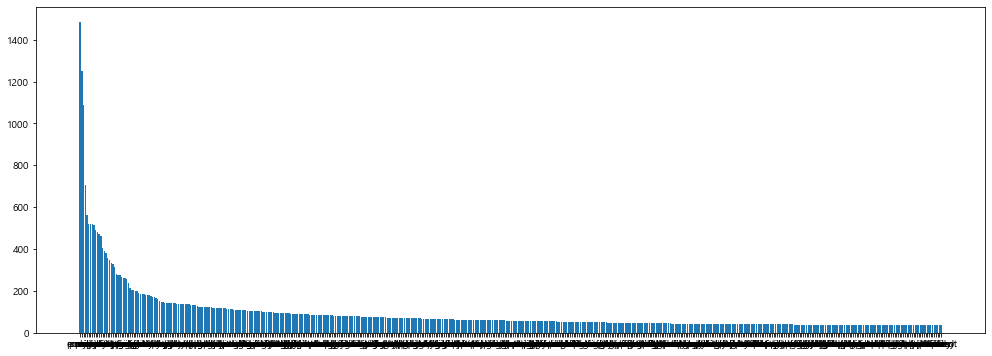

In [9]:
# top 500 graph
y = operation_most_frequent
x = y.index.tolist()

plt.bar(x, y)
plt.show()

In [10]:
operation_most_frequent.nlargest(300) # 50정도로 보겠음!

power        1484
energy       1250
project      1087
plant         708
solar         563
             ... 
leading        52
earnings       51
annual         51
financing      51
team           51
Length: 300, dtype: int64

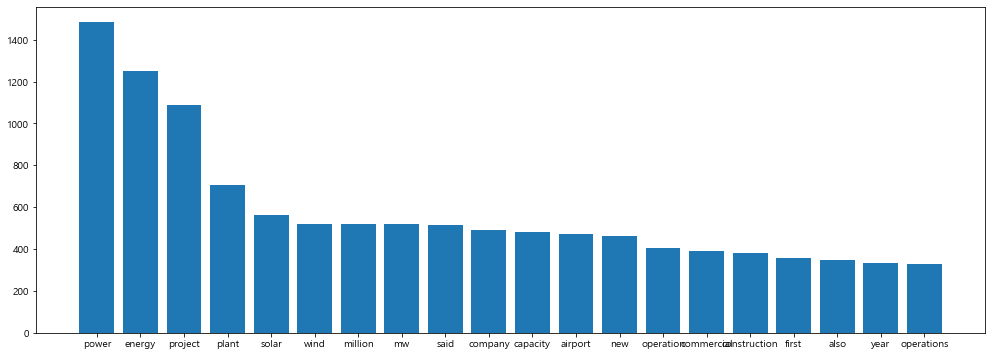

In [11]:
# top 20 graph
y = operation_most_frequent.nlargest(20)
x = y.index.tolist()

plt.bar(x, y)
plt.show()

### b. 'deal_status' == 'Active'

In [12]:
df_active = df[df['deal_status'] == 'Active']
active_sum = df_active.sum(axis = 0, numeric_only = True)
active_sum.sort_values(ascending = False, inplace = True)
active_most_frequent = active_sum.nlargest(500)
active_most_frequent_vocab = active_most_frequent.index.tolist()
"""Uncomment below to check the top 100"""
# active_most_frequent_vocab

'Uncomment below to check the top 100'

In [13]:
active_most_frequent.nlargest(300) # 40정도로 보겠음!

project         1401
power           1222
construction     681
plant            629
dam              559
                ... 
help              42
like              42
existing          42
tunnels           42
chittagong        42
Length: 300, dtype: int64

### c. 'deal_status' == 'Cancelled'

In [14]:
df_cancelled = df[df['deal_status'] == 'Cancelled']
cancelled_sum = df_cancelled.sum(axis = 0, numeric_only = True)
cancelled_sum.sort_values(ascending = False, inplace = True)
cancelled_most_frequent = cancelled_sum.nlargest(500)
cancelled_most_frequent_vocab = cancelled_most_frequent.index.tolist()
"""Uncomment below to check the top 100"""
# cancelled_most_frequent_vocab

'Uncomment below to check the top 100'

In [15]:
cancelled_most_frequent.nlargest(300) # 20정도로 보겠음!

project     489
power       438
said        381
plant       305
projects    254
           ... 
although     19
meet         19
facility     19
works        19
link         19
Length: 300, dtype: int64

In [16]:
type(cancelled_most_frequent)

pandas.core.series.Series

### d. 'deal_status' == 'Delayed'

In [17]:
df_delayed = df[df['deal_status'] == 'Delayed']
delayed_sum = df_delayed.sum(axis = 0, numeric_only = True)
delayed_sum.sort_values(ascending = False, inplace = True)
delayed_most_frequent = delayed_sum.nlargest(500)
delayed_most_frequent_vocab = delayed_most_frequent.index.tolist()
"""Uncomment below to check the top 100"""
# delayed_most_frequent_vocab

'Uncomment below to check the top 100'

In [18]:
delayed_most_frequent.nlargest(300) # 20정도로 보겠음!

project         654
said            511
power           230
projects        215
construction    200
               ... 
cent             21
farm             21
estimated        21
result           21
needed           21
Length: 300, dtype: int64

In [19]:
overlapped_operation_active = (set(active_most_frequent_vocab) & set(operation_most_frequent_vocab))
overlapped_operation_cancelled = (set(operation_most_frequent_vocab) & set(cancelled_most_frequent_vocab))
overlapped_operation_delayed = (set(operation_most_frequent_vocab) & set(delayed_most_frequent_vocab))
overlapped_cancelled_delayed = (set(cancelled_most_frequent_vocab) & set(delayed_most_frequent_vocab))
overlapped_cancelled_active = (set(active_most_frequent_vocab) & set(cancelled_most_frequent_vocab))
overlapped_delayed_active = (set(active_most_frequent_vocab) & set(delayed_most_frequent_vocab))


# overlapped_whole = (set(active_most_frequent_vocab) & set(operation_most_frequent_vocab) &
#                   set(cancelled_most_frequent_vocab) & set(delayed_most_frequent_vocab))
overlapped_operation_active

{'able',
 'according',
 'activities',
 'added',
 'addition',
 'additional',
 'africa',
 'agreement',
 'air',
 'airport',
 'along',
 'already',
 'also',
 'announced',
 'annual',
 'another',
 'approximately',
 'april',
 'area',
 'around',
 'asia',
 'authority',
 'available',
 'bangladesh',
 'bank',
 'based',
 'become',
 'began',
 'billion',
 'bridge',
 'build',
 'building',
 'built',
 'business',
 'capacity',
 'capital',
 'cent',
 'central',
 'chief',
 'china',
 'chinese',
 'city',
 'coal',
 'combined',
 'commercial',
 'commission',
 'commissioned',
 'commissioning',
 'companies',
 'company',
 'complete',
 'completed',
 'completion',
 'constructed',
 'construction',
 'contract',
 'contractor',
 'corporation',
 'cost',
 'costs',
 'could',
 'country',
 'current',
 'currently',
 'day',
 'december',
 'demand',
 'design',
 'designed',
 'develop',
 'developed',
 'development',
 'director',
 'district',
 'domestic',
 'due',
 'east',
 'eastern',
 'economic',
 'economy',
 'electric',
 'electricit

# 3. Word Counting 후 중복 제거 (문제 해결 후보 1)

In [20]:
def exclude_overlapped_ones_simple(target_vocab:list, target:pd.core.series.Series, status1:set, status2:set, status3:set):
    excluded_indexer = list(set(target_vocab) - status1 - status2 - status3)
    excluded = target.loc[excluded_indexer]
    return excluded

In [21]:
operation_unique = exclude_overlapped_ones_simple(operation_most_frequent_vocab, operation_most_frequent, overlapped_operation_active, overlapped_operation_cancelled, overlapped_operation_delayed)
operation_unique_100 = operation_unique.nlargest(100)
operation_unique_100

net         143
ormat       132
adjusted    118
income      112
duke        109
           ... 
advanced     40
supreme      40
supplied     40
strong       40
formosa      40
Length: 100, dtype: int64

In [22]:
active_unique = exclude_overlapped_ones_simple(active_most_frequent_vocab, active_most_frequent, overlapped_operation_active, overlapped_cancelled_active, overlapped_delayed_active)
active_unique_100 = active_unique.nlargest(100)
active_unique_100

hydroelectric    105
tanzania          96
rampal            65
venezuela         64
lower             63
                ... 
cox               28
upstream          28
engineer          28
khan              28
flow              28
Length: 100, dtype: int64

In [23]:
delayed_unique = exclude_overlapped_ones_simple(delayed_most_frequent_vocab, delayed_most_frequent, overlapped_operation_delayed, overlapped_cancelled_delayed, overlapped_delayed_active)
delayed_unique_100 = delayed_unique.nlargest(100)
delayed_unique_100

coronavirus      65
delays           61
edf              59
outbreak         39
acquisition      33
                 ..
inga             15
terms            14
ago              14
massachusetts    14
extension        14
Length: 100, dtype: int64

In [24]:
cancelled_unique = exclude_overlapped_ones_simple(cancelled_most_frequent_vocab, cancelled_most_frequent, overlapped_operation_cancelled, overlapped_cancelled_delayed, overlapped_cancelled_active)
cancelled_unique_100 = cancelled_unique.nlargest(100)
cancelled_unique_100

cancelled       96
cancellation    55
kosovo          53
tender          48
mahathir        48
                ..
opa             15
budhi           15
eia             15
notice          14
size            14
Length: 100, dtype: int64

In [25]:
# exclude overlapped ones (past attempt)
# operation_indexer = list(set(operation_most_frequent_vocab) - overlapped)
# active_indexer = list(set(active_most_frequent_vocab) - overlapped)
# cancelled_indexer = list(set(cancelled_most_frequent_vocab) - overlapped)
# delayed_indexer = list(set(delayed_most_frequent_vocab) - overlapped)

# operation_unique = operation_most_frequent.loc[operation_indexer]
# active_unique = active_most_frequent.loc[active_indexer]
# cancelled_unique = cancelled_most_frequent.loc[cancelled_indexer]
# delayed_unique = delayed_most_frequent.loc[delayed_indexer]

In [30]:
def to_dataframe(ser:pd.Series):
    temp = ser.to_frame()
    temp.columns = ['frequency']
    temp['vocabulary'] = temp.index
    temp.reset_index(drop=True, inplace=True)
    return temp

In [34]:
# Operation 저장
fn = 'results\operation_by_frequency.tsv'
f = to_dataframe(operation_unique_100)

f.to_csv(fn, index=False, sep = '\t')

In [36]:
# Active 저장
fn = r'results\active_by_frequency.tsv'
f = to_dataframe(active_unique_100)

f.to_csv(fn, index=False, sep = '\t')

In [37]:
# Cancelled 저장
fn = r'results\cancelled_by_frequency.tsv'
f = to_dataframe(cancelled_unique_100)

f.to_csv(fn, index=False, sep = '\t')

In [38]:
# Delayed 저장
fn = r'results\delayed_by_frequency.tsv'
f = to_dataframe(delayed_unique_100)

f.to_csv(fn, index=False, sep = '\t')

In [ ]:
# The top 20s of the unique vocabs in the operation (commercial operation)
y = operation_unique.sort_values(ascending = False).nlargest(30)
x = y.index.tolist()

plt.bar(x, y)
plt.show()

In [ ]:
operation_unique.nlargest(30)

In [ ]:
# The top 20s of the unique vocabs in the operation
y = delayed_unique.sort_values(ascending = False).nlargest(20)
x = y.index.tolist()

plt.bar(x, y)
plt.show()

In [ ]:
delayed_unique.nlargest(50)

In [ ]:
# The top 20s of the unique vocabs in the operation
y = cancelled_unique.sort_values(ascending = False).nlargest(20)
x = y.index.tolist()

plt.bar(x, y)
plt.show()

In [ ]:
cancelled_unique.nlargest(50)

- 데이터의 편향성이 매우 잘 나타나는 결과물
- 리서치팀 의견: 특정 회사의 언급 및 언론사가 강조하고자 하는 부문에 단어 집중
- 단어 사용 시 걸러내는 작업 필요함

# 4. Word Appearance로 변환 후 중복 제거 (문제 해결 후보 2)

In [39]:
df_app = df
for col in df.columns:
    if col == 'deal_status' or col == 'body_text' or col == 'word_list':
        continue
    else:
        df_app.loc[df_app[col] > 0, col] = 1
df_app

deal_status                                          body_text  \
0     operation  Saudi Arabia-headquartered utilities company A...   
1     operation  Saudi-based Acwa Power, a major developer of p...   
2     operation  Tata Power has an installed hydro power capaci...   
3     operation  The project will generate around 450 GWh of cl...   
4     operation  Adjaristsqali Georgia (AGL), a joint venture b...   
..          ...                                                ...   
872     Delayed  Hybrid solar-wind-battery complex in Australia...   
873     Delayed  Plans to build the $12 billion Inga 3 hydropow...   
874     Delayed  Global Coal Plant Tracker shows project pipeli...   
875     Delayed  Floating solar project schedule in Seychelles ...   
876     Delayed  The resource you are looking for might have be...   

                                             word_list  jb  nee  rank  \
0    ['east', 'nation', 'saudi', 'communities', 'ho...   0    0     0   
1    ['east', 'operating', 'also', 'saudi', 'commun...   0    0     0   
2    ['hpp', 'gases', 'tata', 'also', 'georgia', 'e...   0    0     0   
3    ['gases', 'hpp', 'exclusively', 'tata', 'georg...   0    0     0   
4    ['hpp', 'institutions', 'gases', 'generated', ...   0    0     0   
..                                                 ...  ..  ...   ...   
872  ['update', 'become', 'wind', 'ongoing', 'facin...   0    0     0   
873  ['image', 'de', 'operating', 'become', 'presid...   0    0     0   
874  ['highlighted', 'bengal', 'slowed', 'defence',...   0    0     0   
875  ['mahe', 'lagoon', 'selected', 'delay', 'news'...   0    0     0   
876  ['looking', 'resource', 'unavailable', 'name',...   0    0     0   

     configuration  analysers  grants  competes  ...  funneled  lodged  \
0                0          0       0         0  ...         0       0   
1                0          0       0         0  ...         0       0   
2                0          0       0         0  ...         0       0   
3                0          0       0         0  ...         0       0   
4                0          0       0         0  ...         0       0   
..             ...        ...     ...       ...  ...       ...     ...   
872              0          0       0         0  ...         0       0   
873              0          0       0         0  ...         0       0   
874              0          0       0         0  ...         0       0   
875              0          0       0         0  ...         0       0   
876              0          0       0         0  ...         0       0   

     prides  lisa  wants  heal  maclennan  ozkan  modernization  grade  
0         0     0      0     0          0      0              0      0  
1         0     0      0     0          0      0              0      0  
2         0     0      0     0          0      0              0      0  
3         0     0      0     0          0      0              0      0  
4         0     0      0     0          0      0              0      0  
..      ...   ...    ...   ...        ...    ...            ...    ...  
872       0     0      0     0          0      0              0      0  
873       0     0      0     0          0      0              0      0  
874       0     0      0     0          0      0              0      0  
875       0     0      0     0          0      0              0      0  
876       0     0      0     0          0      0              0      0  

[877 rows x 18286 columns]

In [40]:
# Check if the conversion worked well
df_app.max()

deal_status                                              operation
body_text        ‘Military tactics are like water, for water in...
word_list        ['ørsted', 'current', 'change', 'economically'...
jb                                                               1
nee                                                              1
                                       ...                        
heal                                                             1
maclennan                                                        1
ozkan                                                            1
modernization                                                    1
grade                                                            1
Length: 18286, dtype: object

In [41]:
# function to calculate the frequency
def return_frequency(input_df:pd.DataFrame, column:str, status:str, n:int):
    df_by_status = input_df[input_df[column] == status]
    app_sum = df_by_status.sum(axis = 0, numeric_only = True)
    most_frequent = app_sum.nlargest(n)
    most_frequent_vocab = most_frequent.index.tolist()
    return most_frequent, most_frequent_vocab

In [42]:
# calculate the frequency using the function and get the top 500
app_operation_frequency, app_operation_vocab = return_frequency(df_app, 'deal_status', 'operation', 500)
app_active_frequency, app_active_vocab = return_frequency(df_app, 'deal_status', 'Active', 500)
app_cancelled_frequency, app_cancelled_vocab = return_frequency(df_app, 'deal_status', 'Cancelled', 500)
app_delayed_frequency, app_delayed_vocab = return_frequency(df_app, 'deal_status', 'Delayed', 500)

In [43]:
# find the overlapped ones
app_overlapped_operation_cancelled = (set(app_operation_vocab) & set(app_cancelled_vocab))
app_overlapped_operation_delayed = (set(app_operation_vocab) & set(app_delayed_vocab))
app_overlapped_operation_active = (set(app_operation_vocab) & set(app_active_vocab))
app_overlapped_cancelled_delayed = (set(app_cancelled_vocab) & set(app_delayed_vocab))
app_overlapped_cancelled_active = (set(app_cancelled_vocab) & set(app_active_vocab))
app_overlapped_delayed_active = (set(app_delayed_vocab) & set(app_active_vocab))

In [44]:
# get rid of the overlapped vocabs
app_operation_unique = exclude_overlapped_ones_simple(app_operation_vocab, app_operation_frequency, app_overlapped_operation_cancelled, app_overlapped_operation_delayed, app_overlapped_operation_active)
app_operation_unique_100 = app_operation_unique.nlargest(100)
app_operation_unique_100

ceo           80
clean         76
online        49
growing       44
tonnes        43
              ..
flight        23
supplying     23
serving       23
america       23
contribute    23
Length: 100, dtype: int64

In [45]:
app_cancelled_unique = exclude_overlapped_ones_simple(app_cancelled_vocab, app_cancelled_frequency, app_overlapped_operation_cancelled, app_overlapped_cancelled_delayed, app_overlapped_cancelled_active)
app_cancelled_unique_100 = app_cancelled_unique.nlargest(100)
app_cancelled_unique_100

cancelled       62
cancellation    27
decided         26
former          21
cancel          21
                ..
show             8
relevant         8
quoted           8
overseas         8
firms            8
Length: 97, dtype: int64

In [46]:
app_delayed_unique = exclude_overlapped_ones_simple(app_delayed_vocab, app_delayed_frequency, app_overlapped_operation_delayed, app_overlapped_cancelled_delayed, app_overlapped_delayed_active)
app_delayed_unique_100 = app_delayed_unique.nlargest(100)
app_delayed_unique_100

delays          43
coronavirus     25
final           23
give            19
pandemic        19
                ..
rise            10
restrictions    10
sought          10
email           10
friday          10
Length: 80, dtype: int64

In [47]:
app_active_unique = exclude_overlapped_ones_simple(app_active_vocab, app_active_frequency, app_overlapped_operation_active, app_overlapped_cancelled_active, app_overlapped_delayed_active)
app_active_unique_100 = app_active_unique.nlargest(100)
app_active_unique_100

hydroelectric    39
hydro            36
tunnel           35
pakistan         34
length           33
                 ..
ii               18
acres            18
left             18
underground      18
communities      17
Length: 69, dtype: int64

In [ ]:
# exclude overlapped ones (past attempt)
# app_overlapped = (set(app_operation_vocab) & set(app_active_vocab) &
#                   set(app_cancelled_vocab) & set(app_delayed_vocab))
# app_overlapped = (set(app_cancelled_vocab) & set(app_delayed_vocab) & set(app_operation_vocab))

# app_operation_indexer = list(set(app_operation_vocab) - app_overlapped)
# app_active_indexer = list(set(app_active_vocab) - app_overlapped)
# app_cancelled_indexer = list(set(app_cancelled_vocab) - app_overlapped)
# app_delayed_indexer = list(set(app_delayed_vocab) - app_overlapped)

# app_operation_unique = app_operation_frequency.loc[app_operation_indexer]
# app_active_unique = app_active_frequency.loc[app_active_indexer]
# app_cancelled_unique = app_cancelled_frequency.loc[app_cancelled_indexer]
# app_delayed_unique = app_delayed_frequency.loc[app_delayed_indexer]

In [ ]:
def to_dataframe(ser:pd.Series):
    temp = ser.to_frame()
    temp.columns = ['frequency']
    temp['vocabulary'] = temp.index
    temp.reset_index(drop=True, inplace=True)
    return temp

In [48]:
# Operation 저장
fn = 'results\operation_by_appearance.tsv'
f = to_dataframe(app_operation_unique_100)

f.to_csv(fn, index=False, sep = '\t')

In [50]:
# Active 저장
fn = r'results\active_by_appearance.tsv'
f = to_dataframe(app_active_unique_100)

f.to_csv(fn, index=False, sep = '\t')

In [51]:
# Cancelled 저장
fn = r'results\cancelled_by_appearance.tsv'
f = to_dataframe(app_cancelled_unique_100)

f.to_csv(fn, index=False, sep = '\t')

In [52]:
# Delayed 저장
fn = r'results\delayed_by_appearance.tsv'
f = to_dataframe(app_delayed_unique_100)

f.to_csv(fn, index=False, sep = '\t')

#### 시도 1 (0829)
- operation & active 사이 overlapped 없음 / active와 cancelled, active와 delayed 사이 overlapped는 'report' only
- active만 혼자서 단어군이 매우 튀는 것을 확인할 수 있음
- 따라서, overlap되는 단어들은 active만 제외하고 나머지를 &연산을 함.

#### 시도 2 (0902)
- active의 단어군이 튀는 경우 해결 (단어군을 top 100에서 top 500으로 늘렸더니 겹치는 부분 다수 생김)
- overlap되는 단어들을 두 status간의 overlap만 성사되어도 제외하는 것으로 함

In [ ]:
y = app_operation_unique.sort_values(ascending = False).nlargest(20)
x = y.index.tolist()

plt.bar(x, y)
plt.show()

In [ ]:
active = set(active_unique.index)
app_active = set(app_active_unique.index)
venn2([active, app_active], set_labels = ('word_count', 'word_appearance'))
plt.show()

In [ ]:
operation = set(operation_unique.index)
app_operation = set(app_operation_unique.index)
venn2([operation, app_operation], set_labels = ('word_count', 'word_appearance'))
plt.show()

In [ ]:
cancelled = set(cancelled_unique.index)
app_cancelled = set(app_cancelled_unique.index)
venn2([cancelled, app_cancelled], set_labels = ('word_count', 'word_appearance'))
plt.show()

In [ ]:
delayed = set(delayed_unique.index)
app_delayed = set(app_delayed_unique.index)
venn2([delayed, app_delayed], set_labels = ('word_count', 'word_appearance'))
plt.show()

# 5. 회귀분석 (문제 해결 후보 3)
- 로지스틱 회귀분석을 실시하였음. (종속변수(Y)와 독립변수(X) 간의 관계를 나태내어 예측모델을 생성한다는 점에서 선형회귀 분석과 비슷하지만, 종속변수(Y)의 결과가 범주형으로 분류 분석에 해당)
- 종속변수는 각 status일 것이고(범주형) / 독립변수는 각 단어들의 출현 빈도 (연속형)
- 로지스틱 회귀 분석은 종속변수(Y)에 로짓 변환을 실시. 위 로지스틱 모형식은 독립변수(X)의 값에 관계 없이 종속변수(Y)의 값이 항상 0 - 1 사이에 있도록 하는 것.
- https://myjamong.tistory.com/80 참고함

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# to save model
import pickle
import joblib
# from sklearn.externals import joblib는 이제 지원이 종료됨

In [8]:
df_reg = df
df_reg['deal_status'] = pd.Categorical(df_reg['deal_status'])
df_reg

deal_status                                          body_text  \
0     operation  Saudi Arabia-headquartered utilities company A...   
1     operation  Saudi-based Acwa Power, a major developer of p...   
2     operation  Tata Power has an installed hydro power capaci...   
3     operation  The project will generate around 450 GWh of cl...   
4     operation  Adjaristsqali Georgia (AGL), a joint venture b...   
..          ...                                                ...   
872     Delayed  Hybrid solar-wind-battery complex in Australia...   
873     Delayed  Plans to build the $12 billion Inga 3 hydropow...   
874     Delayed  Global Coal Plant Tracker shows project pipeli...   
875     Delayed  Floating solar project schedule in Seychelles ...   
876     Delayed  The resource you are looking for might have be...   

                                             word_list  jb  nee  rank  \
0    ['east', 'nation', 'saudi', 'communities', 'ho...   0    0     0   
1    ['east', 'operating', 'also', 'saudi', 'commun...   0    0     0   
2    ['hpp', 'gases', 'tata', 'also', 'georgia', 'e...   0    0     0   
3    ['gases', 'hpp', 'exclusively', 'tata', 'georg...   0    0     0   
4    ['hpp', 'institutions', 'gases', 'generated', ...   0    0     0   
..                                                 ...  ..  ...   ...   
872  ['update', 'become', 'wind', 'ongoing', 'facin...   0    0     0   
873  ['image', 'de', 'operating', 'become', 'presid...   0    0     0   
874  ['highlighted', 'bengal', 'slowed', 'defence',...   0    0     0   
875  ['mahe', 'lagoon', 'selected', 'delay', 'news'...   0    0     0   
876  ['looking', 'resource', 'unavailable', 'name',...   0    0     0   

     configuration  analysers  grants  competes  ...  funneled  lodged  \
0                0          0       0         0  ...         0       0   
1                0          0       0         0  ...         0       0   
2                0          0       0         0  ...         0       0   
3                0          0       0         0  ...         0       0   
4                0          0       0         0  ...         0       0   
..             ...        ...     ...       ...  ...       ...     ...   
872              0          0       0         0  ...         0       0   
873              0          0       0         0  ...         0       0   
874              0          0       0         0  ...         0       0   
875              0          0       0         0  ...         0       0   
876              0          0       0         0  ...         0       0   

     prides  lisa  wants  heal  maclennan  ozkan  modernization  grade  
0         0     0      0     0          0      0              0      0  
1         0     0      0     0          0      0              0      0  
2         0     0      0     0          0      0              0      0  
3         0     0      0     0          0      0              0      0  
4         0     0      0     0          0      0              0      0  
..      ...   ...    ...   ...        ...    ...            ...    ...  
872       0     0      0     0          0      0              0      0  
873       0     0      0     0          0      0              0      0  
874       0     0      0     0          0      0              0      0  
875       0     0      0     0          0      0              0      0  
876       0     0      0     0          0      0              0      0  

[877 rows x 18286 columns]

In [9]:
df_reg['deal_status_code'] = df_reg.deal_status.cat.codes
df_reg

deal_status                                          body_text  \
0     operation  Saudi Arabia-headquartered utilities company A...   
1     operation  Saudi-based Acwa Power, a major developer of p...   
2     operation  Tata Power has an installed hydro power capaci...   
3     operation  The project will generate around 450 GWh of cl...   
4     operation  Adjaristsqali Georgia (AGL), a joint venture b...   
..          ...                                                ...   
872     Delayed  Hybrid solar-wind-battery complex in Australia...   
873     Delayed  Plans to build the $12 billion Inga 3 hydropow...   
874     Delayed  Global Coal Plant Tracker shows project pipeli...   
875     Delayed  Floating solar project schedule in Seychelles ...   
876     Delayed  The resource you are looking for might have be...   

                                             word_list  jb  nee  rank  \
0    ['east', 'nation', 'saudi', 'communities', 'ho...   0    0     0   
1    ['east', 'operating', 'also', 'saudi', 'commun...   0    0     0   
2    ['hpp', 'gases', 'tata', 'also', 'georgia', 'e...   0    0     0   
3    ['gases', 'hpp', 'exclusively', 'tata', 'georg...   0    0     0   
4    ['hpp', 'institutions', 'gases', 'generated', ...   0    0     0   
..                                                 ...  ..  ...   ...   
872  ['update', 'become', 'wind', 'ongoing', 'facin...   0    0     0   
873  ['image', 'de', 'operating', 'become', 'presid...   0    0     0   
874  ['highlighted', 'bengal', 'slowed', 'defence',...   0    0     0   
875  ['mahe', 'lagoon', 'selected', 'delay', 'news'...   0    0     0   
876  ['looking', 'resource', 'unavailable', 'name',...   0    0     0   

     configuration  analysers  grants  competes  ...  lodged  prides  lisa  \
0                0          0       0         0  ...       0       0     0   
1                0          0       0         0  ...       0       0     0   
2                0          0       0         0  ...       0       0     0   
3                0          0       0         0  ...       0       0     0   
4                0          0       0         0  ...       0       0     0   
..             ...        ...     ...       ...  ...     ...     ...   ...   
872              0          0       0         0  ...       0       0     0   
873              0          0       0         0  ...       0       0     0   
874              0          0       0         0  ...       0       0     0   
875              0          0       0         0  ...       0       0     0   
876              0          0       0         0  ...       0       0     0   

     wants  heal  maclennan  ozkan  modernization  grade  deal_status_code  
0        0     0          0      0              0      0                 3  
1        0     0          0      0              0      0                 3  
2        0     0          0      0              0      0                 3  
3        0     0          0      0              0      0                 3  
4        0     0          0      0              0      0                 3  
..     ...   ...        ...    ...            ...    ...               ...  
872      0     0          0      0              0      0                 2  
873      0     0          0      0              0      0                 2  
874      0     0          0      0              0      0                 2  
875      0     0          0      0              0      0                 2  
876      0     0          0      0              0      0                 2  

[877 rows x 18287 columns]

In [10]:
new_col = df.columns.tolist()
del new_col[new_col.index('deal_status_code')]
new_col.insert(1, 'deal_status_code')
new_col

['deal_status',
 'deal_status_code',
 'body_text',
 'word_list',
 'jb',
 'nee',
 'rank',
 'configuration',
 'analysers',
 'grants',
 'competes',
 'authorise',
 'termination',
 'button',
 'denies',
 'kajima',
 'shell',
 'tc',
 'vst',
 'greco',
 'slhp',
 'settings',
 'pickering',
 'section',
 'allegation',
 'counterproductive',
 'farruggio',
 'worksite',
 'phasing',
 'ajk',
 'hydraulics',
 'axens',
 'kilometre',
 'gauge',
 'maturity',
 'legal',
 'farmland',
 'cargolux',
 'oppose',
 'turkana',
 'compassion',
 'rahmon',
 'conservator',
 'endorsing',
 'ritual',
 'anju',
 'whether',
 'medog',
 'azima',
 'jostle',
 'cent',
 'spending',
 'show',
 'eia',
 'thermax',
 'patil',
 'semco',
 'auspices',
 'thunderstorm',
 'structures',
 'zambezi',
 'outweighed',
 'fire',
 'report',
 'stealing',
 'taxes',
 'po',
 'interesting',
 'et',
 'ecuador',
 'kmp',
 'torn',
 'tara',
 'monuments',
 'dmtcl',
 'prohibitively',
 'bridges',
 'penh',
 'tickets',
 'unsurpassed',
 'retailer',
 'injustices',
 'stgs',
 'm

In [11]:
df_reg = df_reg[new_col]
df_reg

deal_status  deal_status_code  \
0     operation                 3   
1     operation                 3   
2     operation                 3   
3     operation                 3   
4     operation                 3   
..          ...               ...   
872     Delayed                 2   
873     Delayed                 2   
874     Delayed                 2   
875     Delayed                 2   
876     Delayed                 2   

                                             body_text  \
0    Saudi Arabia-headquartered utilities company A...   
1    Saudi-based Acwa Power, a major developer of p...   
2    Tata Power has an installed hydro power capaci...   
3    The project will generate around 450 GWh of cl...   
4    Adjaristsqali Georgia (AGL), a joint venture b...   
..                                                 ...   
872  Hybrid solar-wind-battery complex in Australia...   
873  Plans to build the $12 billion Inga 3 hydropow...   
874  Global Coal Plant Tracker shows project pipeli...   
875  Floating solar project schedule in Seychelles ...   
876  The resource you are looking for might have be...   

                                             word_list  jb  nee  rank  \
0    ['east', 'nation', 'saudi', 'communities', 'ho...   0    0     0   
1    ['east', 'operating', 'also', 'saudi', 'commun...   0    0     0   
2    ['hpp', 'gases', 'tata', 'also', 'georgia', 'e...   0    0     0   
3    ['gases', 'hpp', 'exclusively', 'tata', 'georg...   0    0     0   
4    ['hpp', 'institutions', 'gases', 'generated', ...   0    0     0   
..                                                 ...  ..  ...   ...   
872  ['update', 'become', 'wind', 'ongoing', 'facin...   0    0     0   
873  ['image', 'de', 'operating', 'become', 'presid...   0    0     0   
874  ['highlighted', 'bengal', 'slowed', 'defence',...   0    0     0   
875  ['mahe', 'lagoon', 'selected', 'delay', 'news'...   0    0     0   
876  ['looking', 'resource', 'unavailable', 'name',...   0    0     0   

     configuration  analysers  grants  ...  funneled  lodged  prides  lisa  \
0                0          0       0  ...         0       0       0     0   
1                0          0       0  ...         0       0       0     0   
2                0          0       0  ...         0       0       0     0   
3                0          0       0  ...         0       0       0     0   
4                0          0       0  ...         0       0       0     0   
..             ...        ...     ...  ...       ...     ...     ...   ...   
872              0          0       0  ...         0       0       0     0   
873              0          0       0  ...         0       0       0     0   
874              0          0       0  ...         0       0       0     0   
875              0          0       0  ...         0       0       0     0   
876              0          0       0  ...         0       0       0     0   

     wants  heal  maclennan  ozkan  modernization  grade  
0        0     0          0      0              0      0  
1        0     0          0      0              0      0  
2        0     0          0      0              0      0  
3        0     0          0      0              0      0  
4        0     0          0      0              0      0  
..     ...   ...        ...    ...            ...    ...  
872      0     0          0      0              0      0  
873      0     0          0      0              0      0  
874      0     0          0      0              0      0  
875      0     0          0      0              0      0  
876      0     0          0      0              0      0  

[877 rows x 18287 columns]

## 5-1) Operation vs. Others

In [13]:
# Prepare dataframe

def status_divisor(x:str, status:str):
    return 1 if x == status else 0

In [12]:
df_op_reg = df_reg
df_op_reg['deal_status_code'] = df_op_reg['deal_status'].apply(lambda x:status_divisor(x, 'operation'))
df_op_reg

deal_status  deal_status_code  \
0     operation                 1   
1     operation                 1   
2     operation                 1   
3     operation                 1   
4     operation                 1   
..          ...               ...   
872     Delayed                 0   
873     Delayed                 0   
874     Delayed                 0   
875     Delayed                 0   
876     Delayed                 0   

                                             body_text  \
0    Saudi Arabia-headquartered utilities company A...   
1    Saudi-based Acwa Power, a major developer of p...   
2    Tata Power has an installed hydro power capaci...   
3    The project will generate around 450 GWh of cl...   
4    Adjaristsqali Georgia (AGL), a joint venture b...   
..                                                 ...   
872  Hybrid solar-wind-battery complex in Australia...   
873  Plans to build the $12 billion Inga 3 hydropow...   
874  Global Coal Plant Tracker shows project pipeli...   
875  Floating solar project schedule in Seychelles ...   
876  The resource you are looking for might have be...   

                                             word_list  jb  nee  rank  \
0    ['east', 'nation', 'saudi', 'communities', 'ho...   0    0     0   
1    ['east', 'operating', 'also', 'saudi', 'commun...   0    0     0   
2    ['hpp', 'gases', 'tata', 'also', 'georgia', 'e...   0    0     0   
3    ['gases', 'hpp', 'exclusively', 'tata', 'georg...   0    0     0   
4    ['hpp', 'institutions', 'gases', 'generated', ...   0    0     0   
..                                                 ...  ..  ...   ...   
872  ['update', 'become', 'wind', 'ongoing', 'facin...   0    0     0   
873  ['image', 'de', 'operating', 'become', 'presid...   0    0     0   
874  ['highlighted', 'bengal', 'slowed', 'defence',...   0    0     0   
875  ['mahe', 'lagoon', 'selected', 'delay', 'news'...   0    0     0   
876  ['looking', 'resource', 'unavailable', 'name',...   0    0     0   

     configuration  analysers  grants  ...  funneled  lodged  prides  lisa  \
0                0          0       0  ...         0       0       0     0   
1                0          0       0  ...         0       0       0     0   
2                0          0       0  ...         0       0       0     0   
3                0          0       0  ...         0       0       0     0   
4                0          0       0  ...         0       0       0     0   
..             ...        ...     ...  ...       ...     ...     ...   ...   
872              0          0       0  ...         0       0       0     0   
873              0          0       0  ...         0       0       0     0   
874              0          0       0  ...         0       0       0     0   
875              0          0       0  ...         0       0       0     0   
876              0          0       0  ...         0       0       0     0   

     wants  heal  maclennan  ozkan  modernization  grade  
0        0     0          0      0              0      0  
1        0     0          0      0              0      0  
2        0     0          0      0              0      0  
3        0     0          0      0              0      0  
4        0     0          0      0              0      0  
..     ...   ...        ...    ...            ...    ...  
872      0     0          0      0              0      0  
873      0     0          0      0              0      0  
874      0     0          0      0              0      0  
875      0     0          0      0              0      0  
876      0     0          0      0              0      0  

[877 rows x 18287 columns]

In [13]:
# seperate independent variable & dependent variable

x = df_op_reg.loc[:, 'jb':'grade']
y = df_op_reg['deal_status_code']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

657
220
657
220


In [15]:
op_log_reg = LogisticRegression()
op_log_reg.fit(x_train, y_train)

x2 = sm.add_constant(x)
model = sm.OLS(y, x2)
op_result = model.fit()
print(op_result.summary())

y_pred = op_log_reg.predict(x_test)
print(y_pred)
print(list(y_test))

print('정확도 :', metrics.accuracy_score(y_test, y_pred))

                            OLS Regression Results                            
Dep. Variable:       deal_status_code   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     1.373
Date:                Wed, 16 Sep 2020   Prob (F-statistic):              0.288
Time:                        02:29:45   Log-Likelihood:                 1430.5
No. Observations:                 877   AIC:                            -1129.
Df Residuals:                      11   BIC:                             3007.
Df Model:                         865                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

[1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1
 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1
 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0
 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0
 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0
 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1]
[1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 

In [16]:
type(op_result)

statsmodels.regression.linear_model.RegressionResultsWrapper

### Sensitivity Analysis
변수 중요도 (variable importance, feature importance): 전체 관측치를 사용해 적합한 모델 단위의 변수별 (상대적) 중요도를 나타냄
관측치별 변수별 기여도(민감도): 개별 관측치 단위에서 한개의 칼럼이 모델 예측치에 얼마나 기여하는지를 나타냄
 -> 특정 관측치별로 개별적으로 어떤 변수가 예측치에 크게 영향을 미쳤는지 파악하기 위해서 사용

In [6]:
# UDF for contribution(sensitivity) analysis per each variables
# task: "LinearReg" or "LogitReg"
# 코드참조: https://rfriend.tistory.com/513 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

def sensitivity_analysis_LinearReg_LogitReg(task, model, X, idx, bar_plot_yn):
    pd.options.mode.chained_assignment = None
    
    # get one object's X values

    X_i = X.iloc[idx, :]
    # make a matrix with zeros with shape of [num_cols, num_cols]
    X_mat = np.zeros(shape=[X_i.shape[0], X_i.shape[0]])

    # fil X_mat with values from one by one columns, leaving the ohters zeros
    for i, j in enumerate(X_i):
        X_mat[i, i] = j
    # data frame with contribution of each X columns in descending order

    sensitivity_df = pd.DataFrame({'idx': idx, 'task': task, 'x': X_i, 'contribution_x': model.predict(X_mat)})
    

    # ==== Remark =====
    # when used LogisticRegressionsklearn from sklearn.linear_model
    
    if task == "LinearReg":
        sensitivity_df = pd.DataFrame({'idx': idx, 'task': task, 'x': X_i, 'contribution_x': model.predict(X_mat)})
    elif task == "LogitReg":
        sensitivity_df = pd.DataFrame({'idx': idx, 'task': task, 'x': X_i, 'contribution_x': model.predict_proba(X_mat)[:,1]})
    else:
        print('Please choose task one of "LinearReg" or "LogitReg"...')
    
    sensitivity_df = sensitivity_df.sort_values(by='contribution_x', ascending=True)

    
    # if bar_plot_yn == True then display it
    col_n = X_i.shape[0]

    if bar_plot_yn == True:
        sensitivity_df['contribution_x'].plot(kind='barh', figsize=(10, 0.7*col_n))
        plt.title('Sensitivity Analysis', fontsize=18)
        plt.xlabel('Contribution', fontsize=16)
        plt.ylabel('Variable', fontsize=16)
        plt.yticks(fontsize=14)
        plt.show()

    return sensitivity_df.sort_values(by='contribution_x', ascending=False)

In [18]:
# apply sensitivity analysis function on 1st observation for Logistic Regression

op_sensitivity_analysis = sensitivity_analysis_LinearReg_LogitReg(task="LogitReg", model=op_log_reg, X=x_test, idx=0, bar_plot_yn=False)

In [19]:
op_sensitivity_analysis.sort_values(by=['contribution_x'], axis=0, ascending=False)

idx      task   x  contribution_x
energy          0  LogitReg   6        0.634707
electric        0  LogitReg   4        0.489471
solar           0  LogitReg   7        0.422937
operation       0  LogitReg   1        0.401854
commercial      0  LogitReg   1        0.389663
...           ...       ...  ..             ...
county          0  LogitReg   1        0.177458
generation      0  LogitReg   2        0.170612
said            0  LogitReg   2        0.140411
construction    0  LogitReg   2        0.094687
project         0  LogitReg  11        0.045636

[18283 rows x 4 columns]

In [23]:
reg_operation_result_500 = op_sensitivity_analysis['contribution_x'].nlargest(500)
reg_operation_vocab = reg_operation_result_500.index.tolist()

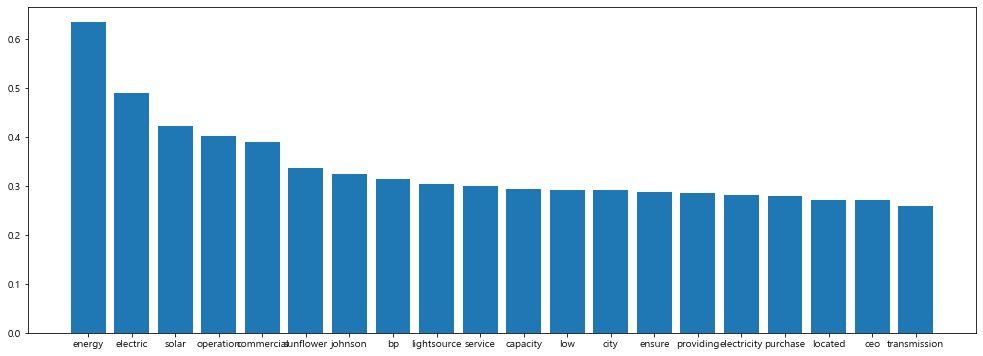

In [21]:
# The top 20s of the important vocabs in the operation
y = reg_operation_result_100.nlargest(20)
x = y.index.tolist()

plt.bar(x, y)
plt.show()

In [19]:
def to_dataframe(ser:pd.Series):
    temp = ser.to_frame()
    temp.columns = ['sensitivity']
    temp['vocabulary'] = temp.index
    temp.reset_index(drop=True, inplace=True)
    return temp

In [29]:
# Operation 저장
fn = 'results\operation_by_logreg.tsv'
f = to_dataframe(reg_operation_result_500)

f.to_csv(fn, index=False, sep = '\t')

## 5-2) Cancelled vs. Others

In [30]:
# Prepare dataframe

df_ca_reg = df_reg
df_ca_reg['deal_status_code'] = df_ca_reg['deal_status'].apply(lambda x:status_divisor(x, 'Cancelled'))

In [31]:
df_ca_reg

deal_status  deal_status_code  \
0     operation                 0   
1     operation                 0   
2     operation                 0   
3     operation                 0   
4     operation                 0   
..          ...               ...   
872     Delayed                 0   
873     Delayed                 0   
874     Delayed                 0   
875     Delayed                 0   
876     Delayed                 0   

                                             body_text  \
0    Saudi Arabia-headquartered utilities company A...   
1    Saudi-based Acwa Power, a major developer of p...   
2    Tata Power has an installed hydro power capaci...   
3    The project will generate around 450 GWh of cl...   
4    Adjaristsqali Georgia (AGL), a joint venture b...   
..                                                 ...   
872  Hybrid solar-wind-battery complex in Australia...   
873  Plans to build the $12 billion Inga 3 hydropow...   
874  Global Coal Plant Tracker shows project pipeli...   
875  Floating solar project schedule in Seychelles ...   
876  The resource you are looking for might have be...   

                                             word_list  jb  nee  rank  \
0    ['east', 'nation', 'saudi', 'communities', 'ho...   0    0     0   
1    ['east', 'operating', 'also', 'saudi', 'commun...   0    0     0   
2    ['hpp', 'gases', 'tata', 'also', 'georgia', 'e...   0    0     0   
3    ['gases', 'hpp', 'exclusively', 'tata', 'georg...   0    0     0   
4    ['hpp', 'institutions', 'gases', 'generated', ...   0    0     0   
..                                                 ...  ..  ...   ...   
872  ['update', 'become', 'wind', 'ongoing', 'facin...   0    0     0   
873  ['image', 'de', 'operating', 'become', 'presid...   0    0     0   
874  ['highlighted', 'bengal', 'slowed', 'defence',...   0    0     0   
875  ['mahe', 'lagoon', 'selected', 'delay', 'news'...   0    0     0   
876  ['looking', 'resource', 'unavailable', 'name',...   0    0     0   

     configuration  analysers  grants  ...  funneled  lodged  prides  lisa  \
0                0          0       0  ...         0       0       0     0   
1                0          0       0  ...         0       0       0     0   
2                0          0       0  ...         0       0       0     0   
3                0          0       0  ...         0       0       0     0   
4                0          0       0  ...         0       0       0     0   
..             ...        ...     ...  ...       ...     ...     ...   ...   
872              0          0       0  ...         0       0       0     0   
873              0          0       0  ...         0       0       0     0   
874              0          0       0  ...         0       0       0     0   
875              0          0       0  ...         0       0       0     0   
876              0          0       0  ...         0       0       0     0   

     wants  heal  maclennan  ozkan  modernization  grade  
0        0     0          0      0              0      0  
1        0     0          0      0              0      0  
2        0     0          0      0              0      0  
3        0     0          0      0              0      0  
4        0     0          0      0              0      0  
..     ...   ...        ...    ...            ...    ...  
872      0     0          0      0              0      0  
873      0     0          0      0              0      0  
874      0     0          0      0              0      0  
875      0     0          0      0              0      0  
876      0     0          0      0              0      0  

[877 rows x 18287 columns]

In [32]:
# seperate independent variable & dependent variable
x = df_ca_reg.loc[:, 'jb':'grade']
y = df_ca_reg['deal_status_code']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

ca_log_reg = LogisticRegression()
ca_log_reg.fit(x_train, y_train)

x2 = sm.add_constant(x)
model = sm.OLS(y, x2)
ca_result = model.fit()
print(ca_result.summary())

y_pred = ca_log_reg.predict(x_test)
print(y_pred)
print(list(y_test))

print('정확도 :', metrics.accuracy_score(y_test, y_pred))

                            OLS Regression Results                            
Dep. Variable:       deal_status_code   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     1.691
Date:                Wed, 16 Sep 2020   Prob (F-statistic):              0.163
Time:                        02:35:12   Log-Likelihood:                 1824.9
No. Observations:                 877   AIC:                            -1918.
Df Residuals:                      11   BIC:                             2219.
Df Model:                         865                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

정확도 : 0.95


In [33]:
# apply sensitivity analysis function on 1st observation for Logistic Regression

ca_sensitivity_analysis = sensitivity_analysis_LinearReg_LogitReg(task="LogitReg", model=ca_log_reg, X=x_test, idx=0, bar_plot_yn=False)
ca_sensitivity_analysis.sort_values(by=['contribution_x'], axis=0, ascending=False)

idx      task   x  contribution_x
solar           0  LogitReg   7        0.197078
state           0  LogitReg   2        0.131873
city            0  LogitReg   2        0.130979
projects        0  LogitReg   1        0.120024
key             0  LogitReg   1        0.118999
...           ...       ...  ..             ...
electric        0  LogitReg   4        0.060067
capacity        0  LogitReg   2        0.060059
project         0  LogitReg  11        0.052489
construction    0  LogitReg   2        0.050457
energy          0  LogitReg   6        0.032061

[18283 rows x 4 columns]

In [34]:
reg_cancelled_result_500 = ca_sensitivity_analysis['contribution_x'].nlargest(500)
reg_cancelled_vocab = reg_cancelled_result_500.index.tolist()

In [35]:
# Cancelled 저장
fn = 'results\cancelled_by_logreg.tsv'
f = to_dataframe(reg_cancelled_result_500)

f.to_csv(fn, index=False, sep = '\t')

In [ ]:
# The top 20s of the important vocabs in cancelled
y = reg_cancelled_result_100.nlargest(20)
x = y.index.tolist()

plt.bar(x, y)
plt.show()

## 5-3) Delayed vs. Others

In [36]:
# Prepare dataframe

df_de_reg = df_reg
df_de_reg['deal_status_code'] = df_de_reg['deal_status'].apply(lambda x:status_divisor(x, 'Delayed'))

In [37]:
df_de_reg

deal_status  deal_status_code  \
0     operation                 0   
1     operation                 0   
2     operation                 0   
3     operation                 0   
4     operation                 0   
..          ...               ...   
872     Delayed                 1   
873     Delayed                 1   
874     Delayed                 1   
875     Delayed                 1   
876     Delayed                 1   

                                             body_text  \
0    Saudi Arabia-headquartered utilities company A...   
1    Saudi-based Acwa Power, a major developer of p...   
2    Tata Power has an installed hydro power capaci...   
3    The project will generate around 450 GWh of cl...   
4    Adjaristsqali Georgia (AGL), a joint venture b...   
..                                                 ...   
872  Hybrid solar-wind-battery complex in Australia...   
873  Plans to build the $12 billion Inga 3 hydropow...   
874  Global Coal Plant Tracker shows project pipeli...   
875  Floating solar project schedule in Seychelles ...   
876  The resource you are looking for might have be...   

                                             word_list  jb  nee  rank  \
0    ['east', 'nation', 'saudi', 'communities', 'ho...   0    0     0   
1    ['east', 'operating', 'also', 'saudi', 'commun...   0    0     0   
2    ['hpp', 'gases', 'tata', 'also', 'georgia', 'e...   0    0     0   
3    ['gases', 'hpp', 'exclusively', 'tata', 'georg...   0    0     0   
4    ['hpp', 'institutions', 'gases', 'generated', ...   0    0     0   
..                                                 ...  ..  ...   ...   
872  ['update', 'become', 'wind', 'ongoing', 'facin...   0    0     0   
873  ['image', 'de', 'operating', 'become', 'presid...   0    0     0   
874  ['highlighted', 'bengal', 'slowed', 'defence',...   0    0     0   
875  ['mahe', 'lagoon', 'selected', 'delay', 'news'...   0    0     0   
876  ['looking', 'resource', 'unavailable', 'name',...   0    0     0   

     configuration  analysers  grants  ...  funneled  lodged  prides  lisa  \
0                0          0       0  ...         0       0       0     0   
1                0          0       0  ...         0       0       0     0   
2                0          0       0  ...         0       0       0     0   
3                0          0       0  ...         0       0       0     0   
4                0          0       0  ...         0       0       0     0   
..             ...        ...     ...  ...       ...     ...     ...   ...   
872              0          0       0  ...         0       0       0     0   
873              0          0       0  ...         0       0       0     0   
874              0          0       0  ...         0       0       0     0   
875              0          0       0  ...         0       0       0     0   
876              0          0       0  ...         0       0       0     0   

     wants  heal  maclennan  ozkan  modernization  grade  
0        0     0          0      0              0      0  
1        0     0          0      0              0      0  
2        0     0          0      0              0      0  
3        0     0          0      0              0      0  
4        0     0          0      0              0      0  
..     ...   ...        ...    ...            ...    ...  
872      0     0          0      0              0      0  
873      0     0          0      0              0      0  
874      0     0          0      0              0      0  
875      0     0          0      0              0      0  
876      0     0          0      0              0      0  

[877 rows x 18287 columns]

In [38]:
# seperate independent variable & dependent variable
x = df_de_reg.loc[:, 'jb':'grade']
y = df_de_reg['deal_status_code']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

de_log_reg = LogisticRegression()
de_log_reg.fit(x_train, y_train)

x2 = sm.add_constant(x)
model = sm.OLS(y, x2)
de_result = model.fit()
print(de_result.summary())

y_pred = de_log_reg.predict(x_test)
print(y_pred)
print(list(y_test))

print('정확도 :', metrics.accuracy_score(y_test, y_pred))

                            OLS Regression Results                            
Dep. Variable:       deal_status_code   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.489e+26
Date:                Wed, 16 Sep 2020   Prob (F-statistic):          1.78e-147
Time:                        02:37:42   Log-Likelihood:                 28851.
No. Observations:                 877   AIC:                        -5.597e+04
Df Residuals:                      11   BIC:                        -5.183e+04
Df Model:                         865                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

In [39]:
# apply sensitivity analysis function on 1st observation for Logistic Regression

de_sensitivity_analysis = sensitivity_analysis_LinearReg_LogitReg(task="LogitReg", model=de_log_reg, X=x_test, idx=0, bar_plot_yn=False)
de_sensitivity_analysis.sort_values(by=['contribution_x'], axis=0, ascending=False)

idx      task   x  contribution_x
project         0  LogitReg  11        0.041990
transmission    0  LogitReg   3        0.033366
said            0  LogitReg   2        0.032770
line            0  LogitReg   1        0.030538
city            0  LogitReg   2        0.029765
...           ...       ...  ..             ...
electric        0  LogitReg   4        0.017440
development     0  LogitReg   1        0.016425
capacity        0  LogitReg   2        0.015175
solar           0  LogitReg   7        0.012551
power           0  LogitReg   5        0.008730

[18283 rows x 4 columns]

In [40]:
reg_delayed_result_500 = de_sensitivity_analysis['contribution_x'].nlargest(500)
reg_delayed_vocab = reg_delayed_result_500.index.tolist()

In [41]:
# Cancelled 저장
fn = 'results\delayed_by_logreg.tsv'
f = to_dataframe(reg_delayed_result_500)

f.to_csv(fn, index=False, sep = '\t')

In [ ]:
# The top 20s of the important vocabs in delayed
y = reg_delayed_result_100.nlargest(20)
x = y.index.tolist()

plt.bar(x, y)
plt.show()

## 5-4) Active vs. Others

In [14]:
# Prepare dataframe

df_ac_reg = df_reg
df_ac_reg['deal_status_code'] = df_ac_reg['deal_status'].apply(lambda x:status_divisor(x, 'Active'))

In [15]:
df_ac_reg

deal_status  deal_status_code  \
0     operation                 0   
1     operation                 0   
2     operation                 0   
3     operation                 0   
4     operation                 0   
..          ...               ...   
872     Delayed                 0   
873     Delayed                 0   
874     Delayed                 0   
875     Delayed                 0   
876     Delayed                 0   

                                             body_text  \
0    Saudi Arabia-headquartered utilities company A...   
1    Saudi-based Acwa Power, a major developer of p...   
2    Tata Power has an installed hydro power capaci...   
3    The project will generate around 450 GWh of cl...   
4    Adjaristsqali Georgia (AGL), a joint venture b...   
..                                                 ...   
872  Hybrid solar-wind-battery complex in Australia...   
873  Plans to build the $12 billion Inga 3 hydropow...   
874  Global Coal Plant Tracker shows project pipeli...   
875  Floating solar project schedule in Seychelles ...   
876  The resource you are looking for might have be...   

                                             word_list  jb  nee  rank  \
0    ['east', 'nation', 'saudi', 'communities', 'ho...   0    0     0   
1    ['east', 'operating', 'also', 'saudi', 'commun...   0    0     0   
2    ['hpp', 'gases', 'tata', 'also', 'georgia', 'e...   0    0     0   
3    ['gases', 'hpp', 'exclusively', 'tata', 'georg...   0    0     0   
4    ['hpp', 'institutions', 'gases', 'generated', ...   0    0     0   
..                                                 ...  ..  ...   ...   
872  ['update', 'become', 'wind', 'ongoing', 'facin...   0    0     0   
873  ['image', 'de', 'operating', 'become', 'presid...   0    0     0   
874  ['highlighted', 'bengal', 'slowed', 'defence',...   0    0     0   
875  ['mahe', 'lagoon', 'selected', 'delay', 'news'...   0    0     0   
876  ['looking', 'resource', 'unavailable', 'name',...   0    0     0   

     configuration  analysers  grants  ...  funneled  lodged  prides  lisa  \
0                0          0       0  ...         0       0       0     0   
1                0          0       0  ...         0       0       0     0   
2                0          0       0  ...         0       0       0     0   
3                0          0       0  ...         0       0       0     0   
4                0          0       0  ...         0       0       0     0   
..             ...        ...     ...  ...       ...     ...     ...   ...   
872              0          0       0  ...         0       0       0     0   
873              0          0       0  ...         0       0       0     0   
874              0          0       0  ...         0       0       0     0   
875              0          0       0  ...         0       0       0     0   
876              0          0       0  ...         0       0       0     0   

     wants  heal  maclennan  ozkan  modernization  grade  
0        0     0          0      0              0      0  
1        0     0          0      0              0      0  
2        0     0          0      0              0      0  
3        0     0          0      0              0      0  
4        0     0          0      0              0      0  
..     ...   ...        ...    ...            ...    ...  
872      0     0          0      0              0      0  
873      0     0          0      0              0      0  
874      0     0          0      0              0      0  
875      0     0          0      0              0      0  
876      0     0          0      0              0      0  

[877 rows x 18287 columns]

In [16]:
# seperate independent variable & dependent variable
x = df_ac_reg.loc[:, 'jb':'grade']
y = df_ac_reg['deal_status_code']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

ac_log_reg = LogisticRegression()
ac_log_reg.fit(x_train, y_train)

x2 = sm.add_constant(x)
model = sm.OLS(y, x2)
ac_result = model.fit()
print(ac_result.summary())

y_pred = ac_log_reg.predict(x_test)
print(y_pred)
print(list(y_test))

print('정확도 :', metrics.accuracy_score(y_test, y_pred))

                            OLS Regression Results                            
Dep. Variable:       deal_status_code   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     1.986
Date:                Wed, 16 Sep 2020   Prob (F-statistic):             0.0984
Time:                        02:44:15   Log-Likelihood:                 1659.5
No. Observations:                 877   AIC:                            -1587.
Df Residuals:                      11   BIC:                             2549.
Df Model:                         865                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

[0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1
 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0]
[0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 

In [17]:
# apply sensitivity analysis function on 1st observation for Logistic Regression

ac_sensitivity_analysis = sensitivity_analysis_LinearReg_LogitReg(task="LogitReg", model=ac_log_reg, X=x_test, idx=0, bar_plot_yn=False)
ac_sensitivity_analysis.sort_values(by=['contribution_x'], axis=0, ascending=False)

idx      task   x  contribution_x
construction    0  LogitReg   2        0.721434
project         0  LogitReg  11        0.627613
county          0  LogitReg   1        0.567686
development     0  LogitReg   1        0.547923
site            0  LogitReg   1        0.536108
...           ...       ...  ..             ...
electric        0  LogitReg   4        0.326103
operation       0  LogitReg   1        0.316429
city            0  LogitReg   2        0.236765
energy          0  LogitReg   6        0.177095
solar           0  LogitReg   7        0.061786

[18283 rows x 4 columns]

In [18]:
reg_active_result_500 = ac_sensitivity_analysis['contribution_x'].nlargest(500)
reg_active_vocab = reg_active_result_500.index.tolist()

In [21]:
# Active 저장
fn = r'results\active_by_logreg.tsv'
f = to_dataframe(reg_active_result_500)

f.to_csv(fn, index=False, sep = '\t')

In [ ]:
# The top 20s of the important vocabs in active
y = reg_active_result_100.nlargest(20)
x = y.index.tolist()

plt.bar(x, y)
plt.show()

- p-value는, 귀무가설(null hypothesis, H0)이 맞다는 전제 하에, 통계값(statistics)1이 실제로 관측된 값 이상일 확률을 의미
- p-value가 작은 단어들을 보면, const(0.003), jb(0.158), authorise(0.116), settings (0.095), stabilise(0.112)...? 머지...
- multicollinearity problems가 의심되므로 서로 연관 있는 단어를 삭제하여야 함.

# 6. 의사결정나무 (문제 해결 후보 4)

In [ ]:
# The names of the DataFrames: df_op_reg. df_ca_reg, df_de_reg, df_ac_reg
# import libraries
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
import pydotplus
import os

In [ ]:
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz 2.44.1\bin/'

## 6-1) Operation

In [ ]:
# seperate independent variable & dependent variable

x = df_op_reg.loc[:, 'jb':'grade']
y = df_op_reg['deal_status_code']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

In [ ]:
# use every leaf nodes
dt_clf_op = DecisionTreeClassifier(random_state = 0)
dt_clf_op.fit(x_train, y_train)

In [ ]:
y_pred = dt_clf_op.predict(x_test)

print('정확도 :', metrics.accuracy_score(y_test, y_pred))

In [ ]:
feature_names = x.columns.tolist()
target_name = np.array(['Else', 'Operation'])

In [ ]:
dt_op_dot = tree.export_graphviz(dt_clf_op, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)

In [ ]:
dt_graph = pydotplus.graph_from_dot_data(dt_op_dot)

In [ ]:
Image(dt_graph.create_png())

## 6-2) Cancelled

In [ ]:
# seperate independent variable & dependent variable

x = df_ca_reg.loc[:, 'jb':'grade']
y = df_ca_reg['deal_status_code']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# use every leaf nodes
dt_clf_ca = DecisionTreeClassifier(random_state = 0)
dt_clf_ca.fit(x_train, y_train)

y_pred = dt_clf_ca.predict(x_test)

print('정확도 :', metrics.accuracy_score(y_test, y_pred))

In [ ]:
feature_names = x.columns.tolist()
target_name = np.array(['Else', 'Cancelled'])
dt_ca_dot = tree.export_graphviz(dt_clf_ca, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)
dt_graph = pydotplus.graph_from_dot_data(dt_ca_dot)
Image(dt_graph.create_png())

## 6-3) Delayed

In [ ]:
# seperate independent variable & dependent variable

x = df_de_reg.loc[:, 'jb':'grade']
y = df_de_reg['deal_status_code']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# use every leaf nodes
dt_clf_de = DecisionTreeClassifier(random_state = 0)
dt_clf_de.fit(x_train, y_train)

y_pred = dt_clf_de.predict(x_test)

print('정확도 :', metrics.accuracy_score(y_test, y_pred))

In [ ]:
feature_names = x.columns.tolist()
target_name = np.array(['Else', 'Delayed'])
dt_de_dot = tree.export_graphviz(dt_clf_de, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)
dt_graph = pydotplus.graph_from_dot_data(dt_de_dot)
Image(dt_graph.create_png())

## 6-4) Active

In [ ]:
# seperate independent variable & dependent variable

x = df_ac_reg.loc[:, 'jb':'grade']
y = df_ac_reg['deal_status_code']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# use every leaf nodes
dt_clf_ac = DecisionTreeClassifier(random_state = 0)
dt_clf_ac.fit(x_train, y_train)

y_pred = dt_clf_ac.predict(x_test)

print('정확도 :', metrics.accuracy_score(y_test, y_pred))

In [ ]:
feature_names = x.columns.tolist()
target_name = np.array(['Else', 'Active'])
dt_ac_dot = tree.export_graphviz(dt_clf_ac, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)
dt_graph = pydotplus.graph_from_dot_data(dt_ac_dot)
Image(dt_graph.create_png())

# 7. 결론 및 개선점

In [ ]:
from wordcloud import WordCloud

In [ ]:
op_list = operation_unique.index.tolist()

In [ ]:
op_tup = []
for e in op_list:
    temp = e, operation_unique.loc[e]
    op_tup.append(temp)
op_tup

In [ ]:
# 히히 워드클라우드 만드는중
wc = WordCloud()
WordCloud.generate_from_frequencies(dict(op_tup))